In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier as classifier


In [2]:
data= pd.read_csv(r"/Users/namanparuthi/Downloads/smoking_driking_dataset_Ver01.csv")

In [3]:
data.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [4]:
from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()

data['DRK_YN'] = la.fit_transform(data['DRK_YN'])


In [5]:
data['DRK_YN'].value_counts()

DRK_YN
0    495858
1    495488
Name: count, dtype: int64

Here N represents non-drinkers, whereas Y represents drinkers

In [6]:
data.drop(['sex'], inplace=True, axis=1)


In [7]:
data.groupby('DRK_YN').mean()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
DRK_YN,,,,,,,,,,,,,,,,,,,,,
0,51.648809,158.764848,59.977998,80.131769,0.933964,0.933205,1.041679,1.040481,121.950591,75.055403,...,56.204200,114.603191,121.476582,13.755567,1.095592,0.831262,25.064444,24.100658,26.798521,1.321110
1,43.577160,165.718998,66.592571,82.335770,1.027740,1.023687,1.021302,1.020463,122.914765,77.050597,...,57.669948,111.471025,142.814884,14.704434,1.092856,0.889693,26.914864,27.410680,47.481893,1.895348


Here, by analysis of data for drinkers and non-drinkers, we can conclude that alcohol affects triglyceride,gamma_GTP levels heavily.

In [8]:
y= data.loc[:,"DRK_YN"]
x=data.loc[:, ('triglyceride', 'gamma_GTP')]


In [9]:
#normalising X 

import scipy
X=scipy.stats.zscore(x)

In [10]:
print(X)

        triglyceride  gamma_GTP
0          -0.392788   0.056791
1          -0.109022  -0.201022
2          -0.275368   0.612081
3          -0.255798  -0.379508
4          -0.275368  -0.240685
...              ...        ...
991341     -0.001387  -0.201022
991342     -0.852685  -0.439003
991343      0.243239  -0.399340
991344     -0.774404  -0.399340
991345      0.301949  -0.022536

[991346 rows x 2 columns]


In [11]:
x.shape, y.shape

((991346, 2), (991346,))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=99)

In [14]:
x_train.shape, y_train.shape

((793076, 2), (793076,))

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
le = LinearRegression()

In [21]:
le.fit(x_train, y_train)

LinearRegression()

In [22]:
y_pred = le.predict(x_test)


In [23]:
y_pred

array([0.50005363, 0.48315239, 0.48122732, ..., 0.42786286, 0.45595731,
       0.45595731])

In [24]:
from sklearn.metrics import mean_squared_error

In [26]:
mean_squared_error(y_test,y_pred)


0.2388366874499975

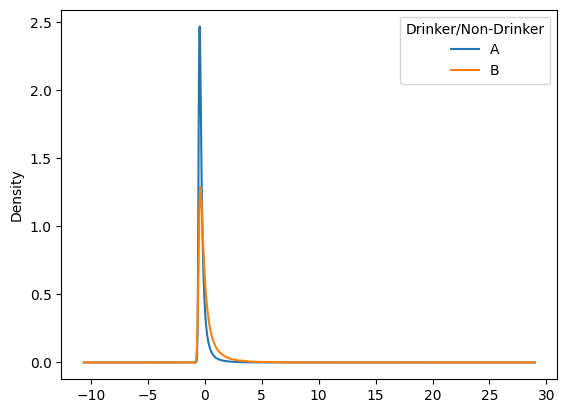

In [27]:
data_truecopy=data.copy()
data_truecopy=scipy.stats.zscore(data_truecopy)
data_truecopy.groupby('DRK_YN')["gamma_GTP"].plot(kind='kde')
plt.legend(['A', 'B'], title='Drinker/Non-Drinker')

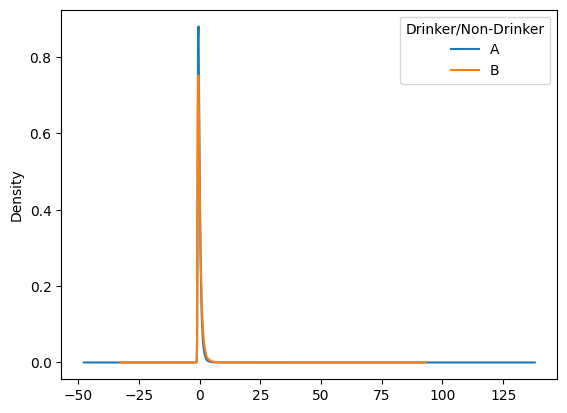

In [28]:
data_truecopy=data.copy()
data_truecopy=scipy.stats.zscore(data_truecopy)
data_truecopy.groupby('DRK_YN')["triglyceride"].plot(kind='kde')
plt.legend(['A', 'B'], title='Drinker/Non-Drinker')